# **Step 1: Read the dataset using Pandas.**

In [ ]:
import pandas as pd

In [ ]:
wdas = pd.read_csv('/content/india_weather_data - Sheet1.csv')
wdas

,Date,City,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%),Visibility (km),Weather Condition
0,2025-03-01,Mumbai,24.0,83,1.2,23.2,1025,69,3.1,Foggy
1,2025-03-02,Mumbai,16.2,58,13.7,33.6,1021,78,8.8,Sunny
2,2025-03-03,Mumbai,34.7,67,7.3,34.3,1015,41,4.5,Windy
3,2025-03-04,Mumbai,NaN,59,15.4,17.6,983,58,2.4,Drizzle
4,2025-03-05,Mumbai,NaN,87,7.7,24.6,1015,96,3.5,Cloudy
...,...,...,...,...,...,...,...,...,...,...
895,2025-03-26,Dhanbad,32.8,86,8.4,6.0,1020,52,9.9,Thunderstorm
896,2025-03-27,Dhanbad,24.8,50,16.9,30.6,1023,20,4.4,Foggy
897,2025-03-28,Dhanbad,35.7,39,19.5,45.3,1007,52,8.5,Rainy
898,2025-03-29,Dhanbad,17.0,85,19.1,19.4,1015,5,2.9,Foggy


In [ ]:
# Display first few rows
wdas.head()

,Date,City,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%),Visibility (km),Weather Condition
0,2025-03-01,Mumbai,24.0,83,1.2,23.2,1025,69,3.1,Foggy
1,2025-03-02,Mumbai,16.2,58,13.7,33.6,1021,78,8.8,Sunny
2,2025-03-03,Mumbai,34.7,67,7.3,34.3,1015,41,4.5,Windy
3,2025-03-04,Mumbai,NaN,59,15.4,17.6,983,58,2.4,Drizzle
4,2025-03-05,Mumbai,NaN,87,7.7,24.6,1015,96,3.5,Cloudy


# **Step 2: Check for null values**

In [ ]:
# Check for missing values
print(wdas.isnull().sum())

Date                  0
City                  0
Temperature (°C)      3
Humidity (%)          0
Wind Speed (km/h)     0
Precipitation (mm)    0
Pressure (hPa)        0
Cloud Cover (%)       0
Visibility (km)       0
Weather Condition     0
dtype: int64


# **Step 3: Fill Null Values Using Different Methods**

In [ ]:
# Backward fill (bfill)
wdas_bfill = wdas.fillna(method='bfill')

# Forward fill (ffill)
wdas_ffill = wdas.fillna(method='ffill')

# Fill with mean (for numerical columns only)
wdas_mean = wdas.fillna(wdas.mean(numeric_only=True))

# Fill with mode (for categorical columns)
wdas_mode = wdas.fillna(wdas.mode().iloc[0])

# Fill with 0
wdas_zero = wdas.fillna(0)

# Drop rows with null values
wdas_dropped = wdas_bfill.dropna()

# Display results
print("Null values after using bfill:\n", wdas_bfill.isnull().sum())
print("Null values after using mean:\n", wdas_mean.isnull().sum())
print("Null values after using mode:\n", wdas_mode.isnull().sum())
print("Null values after using 0:\n", wdas_zero.isnull().sum())
print("Shape after dropping rows with null values:", wdas_dropped.shape)


Null values after using bfill:
 Date                  0
City                  0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (km/h)     0
Precipitation (mm)    0
Pressure (hPa)        0
Cloud Cover (%)       0
Visibility (km)       0
Weather Condition     0
dtype: int64
Null values after using mean:
 Date                  0
City                  0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (km/h)     0
Precipitation (mm)    0
Pressure (hPa)        0
Cloud Cover (%)       0
Visibility (km)       0
Weather Condition     0
dtype: int64
Null values after using mode:
 Date                  0
City                  0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (km/h)     0
Precipitation (mm)    0
Pressure (hPa)        0
Cloud Cover (%)       0
Visibility (km)       0
Weather Condition     0
dtype: int64
Null values after using 0:
 Date                  0
City                  0
Temperature (°C)      0
Humidity (%)          0
Wind Speed (km/h)     0

/tmp/ipython-input-4292551742.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wdas_bfill = wdas.fillna(method='bfill')
/tmp/ipython-input-4292551742.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wdas_ffill = wdas.fillna(method='ffill')


# **Step 4: Fill Null Values in Temperature Column for Mumbai with Mumbai’s Mean Temperature**

In [ ]:
# Calculate Mumbai's mean temperature
mumbai_mean_temp = wdas[wdas["City"] == "Mumbai"]["Temperature (°C)"].mean()

# Fill NaN values in the Temperature column for Mumbai
wdas.loc[(wdas["City"] == "Mumbai") & (wdas["Temperature (°C)"].isnull()), "Temperature (°C)"] = mumbai_mean_temp

# Check if null values remain in Mumbai’s temperature column
print(wdas[wdas["City"] == "Mumbai"]["Temperature (°C)"].isnull().sum())


0


In [ ]:
wdas.head()

,Date,City,Temperature (°C),Humidity (%),Wind Speed (km/h),Precipitation (mm),Pressure (hPa),Cloud Cover (%),Visibility (km),Weather Condition
0,2025-03-01,Mumbai,24.000000,83,1.2,23.2,1025,69,3.1,Foggy
1,2025-03-02,Mumbai,16.200000,58,13.7,33.6,1021,78,8.8,Sunny
2,2025-03-03,Mumbai,34.700000,67,7.3,34.3,1015,41,4.5,Windy
3,2025-03-04,Mumbai,27.951852,59,15.4,17.6,983,58,2.4,Drizzle
4,2025-03-05,Mumbai,27.951852,87,7.7,24.6,1015,96,3.5,Cloudy


# **Step 5: Renaming Column Names Using Different Methods**


## Using rename() function

In [ ]:
wdas_rename1 = wdas.rename(columns={"Temperature (°C)": "Temp_C", "Humidity (%)": "Humidity_Percentage"})
print(wdas_rename1.head())


         Date    City     Temp_C  Humidity_Percentage  Wind Speed (km/h)  \
0  2025-03-01  Mumbai  24.000000                   83                1.2   
1  2025-03-02  Mumbai  16.200000                   58               13.7   
2  2025-03-03  Mumbai  34.700000                   67                7.3   
3  2025-03-04  Mumbai  27.951852                   59               15.4   
4  2025-03-05  Mumbai  27.951852                   87                7.7   

   Precipitation (mm)  Pressure (hPa)  Cloud Cover (%)  Visibility (km)  \
0                23.2            1025               69              3.1   
1                33.6            1021               78              8.8   
2                34.3            1015               41              4.5   
3                17.6             983               58              2.4   
4                24.6            1015               96              3.5   

  Weather Condition  
0             Foggy  
1             Sunny  
2             Windy  
3   

# **Step 6: SQL Connection**

## Creating SQL Connection Using Different Methods

### **Using MySQL Connector**

In [ ]:
pip install mysql-connector-python streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.6 MB/s eta 0:00:00


In [ ]:
import mysql.connector  # For MySQL database operations
from mysql.connector import Error
import pandas as pd  # For data manipulation and analysis
import streamlit as st  # For building the interactive web app
from datetime import datetime, timedelta  # For handling dates and times
import sys

In [ ]:
# Database configuration
db_config = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': '4000',
    'user': '3vt9swSrSwtAhk9.root',
    'password': 'T1Nulg4HrklVRG7T',
}

# Connect to MySQL
conn = mysql.connector.connect(**db_config)
cur = conn.cursor()
print("Connected to MySQL!")

Connected to MySQL!


In [ ]:
cur.execute("CREATE DATABASE IF NOT EXISTS Weather_System")
cur.execute("USE Weather_System")

## Creating a Table in the Database

In [ ]:
cur.execute("""
    CREATE TABLE IF NOT EXISTS weather_data (
        Date TEXT,
        City TEXT,
        Temperature_C REAL,
        Humidity_Percentage INTEGER,
        Wind_Speed_kmh REAL,
        Precipitation_mm REAL,
        Pressure_hPa INTEGER,
        Cloud_Cover_Percentage INTEGER,
        Visibility_km REAL,
        Weather_Condition TEXT
    );
""")
conn.commit()
print("weather_data Table was created!")

weather_data Table was created!


In [ ]:
print(wdas.shape)

(900, 10)


## Inserting Data into the Table

Now, we'll insert data from the Pandas DataFrame into the SQL table using different methods.

**Using to_sql() (Pandas + SQLAlchemy)**

In [ ]:
data_list = wdas.values.tolist()
query = """
    INSERT INTO weather_data (Date, City, Temperature_C, Humidity_Percentage, Wind_Speed_kmh,
    Precipitation_mm, Pressure_hPa, Cloud_Cover_Percentage, Visibility_km, Weather_Condition)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""
cur.executemany(query, data_list)
conn.commit()
print("Data inserted using to_list()")


Data inserted using to_list()


In [ ]:
cur.execute("SELECT * FROM weather_data")
data = cur.fetchall()
#fetches the names of your columns in dataframe(cursor.description holds the columns info)
columns = [i[0] for i in cur.description]

import pandas as pd
# using the result fetched in cursor, create a new dataframe
df_weather_sql = pd.DataFrame(data,columns=columns)
df_weather_sql

,Date,City,Temperature_C,Humidity_Percentage,Wind_Speed_kmh,Precipitation_mm,Pressure_hPa,Cloud_Cover_Percentage,Visibility_km,Weather_Condition
0,2025-03-01,Mumbai,24.000000,83,1.2,23.2,1025,69,3.1,Foggy
1,2025-03-02,Mumbai,16.200000,58,13.7,33.6,1021,78,8.8,Sunny
2,2025-03-03,Mumbai,34.700000,67,7.3,34.3,1015,41,4.5,Windy
3,2025-03-04,Mumbai,27.951852,59,15.4,17.6,983,58,2.4,Drizzle
4,2025-03-05,Mumbai,27.951852,87,7.7,24.6,1015,96,3.5,Cloudy
...,...,...,...,...,...,...,...,...,...,...
1795,2025-03-26,Dhanbad,32.800000,86,8.4,6.0,1020,52,9.9,Thunderstorm
1796,2025-03-27,Dhanbad,24.800000,50,16.9,30.6,1023,20,4.4,Foggy
1797,2025-03-28,Dhanbad,35.700000,39,19.5,45.3,1007,52,8.5,Rainy
1798,2025-03-29,Dhanbad,17.000000,85,19.1,19.4,1015,5,2.9,Foggy


In [ ]:
df_weather_sql.to_csv('final_weather.csv', index=False)

# **Running SQL Queries**

In [ ]:
results = cur.fetchall()

In [ ]:
def run_query(query):
    cur.execute(query)
    return cur.fetchall()

## 1. Query to Get the Average Temperature for Each City

In [ ]:
from tabulate import tabulate

query1 = "SELECT City, AVG(Temperature_C) AS Avg_Temperature FROM weather_data GROUP BY City;"
cur.execute(query1)
result1 = cur.fetchall()

# Define table headers
headers = ["City", "Avg Temperature (°C)"]

# Print the result as a table
print(tabulate(result1, headers=headers, tablefmt="grid"))

+---------------+------------------------+
| City          |   Avg Temperature (°C) |
+===============+========================+
| Patna         |                28.9933 |
+---------------+------------------------+
| Pune          |                27.61   |
+---------------+------------------------+
| Thane         |                27.9033 |
+---------------+------------------------+
| Kolkata       |                28.4867 |
+---------------+------------------------+
| Mumbai        |                27.9519 |
+---------------+------------------------+
| Delhi         |                27.5667 |
+---------------+------------------------+
| Meerut        |                27.8233 |
+---------------+------------------------+
| Agra          |                27.19   |
+---------------+------------------------+
| Ludhiana      |                28.4    |
+---------------+------------------------+
| Kanpur        |                28.5033 |
+---------------+------------------------+
| Aurangaba

## 2. Query to Find the Hottest and Coldest Day

In [ ]:
query2 = """
    SELECT Date, City, Temperature_C
    FROM weather_data
    WHERE Temperature_C = (SELECT MAX(Temperature_C) FROM weather_data)
    OR Temperature_C = (SELECT MIN(Temperature_C) FROM weather_data);
"""
cur.execute(query2)
result2 = cur.fetchall()
print("Hottest and Coldest Days:", result2)


Hottest and Coldest Days: [('2025-03-14', 'Ahmedabad', 15.0), ('2025-03-12', 'Aurangabad', 40.0), ('2025-03-14', 'Ahmedabad', 15.0), ('2025-03-12', 'Aurangabad', 40.0)]


## 3. Query to Get the Days with the Highest Precipitation

In [ ]:
query3 = "SELECT Date, City, Precipitation_mm FROM weather_data ORDER BY Precipitation_mm DESC LIMIT 10;"
cur.execute(query3)
result3 = cur.fetchall()
print("Days with the Highest Precipitation:", result3)


Days with the Highest Precipitation: [('2025-03-19', 'Rajkot', 49.9), ('2025-03-19', 'Rajkot', 49.9), ('2025-03-28', 'Ludhiana', 49.9), ('2025-03-28', 'Ludhiana', 49.9), ('2025-03-07', 'Hyderabad', 49.8), ('2025-03-02', 'Chennai', 49.8), ('2025-03-08', 'Ludhiana', 49.8), ('2025-03-08', 'Ludhiana', 49.8), ('2025-03-07', 'Hyderabad', 49.8), ('2025-03-02', 'Chennai', 49.8)]


## 4. Query to Find Cities with an Average Humidity Above 80%

In [ ]:
query4 = "SELECT City, AVG(Humidity_Percentage) AS Avg_Humidity FROM weather_data GROUP BY City HAVING Avg_Humidity > 80;"
cur.execute(query4)
result4 = cur.fetchall()
print("Cities with Average Humidity Above 80%:", result4)


Cities with Average Humidity Above 80%: []


## 5. Query to Get the Monthly Average Wind Speed for Each City

In [ ]:
query5 = """
    SELECT MONTH(Date) AS Month, City, AVG(Wind_Speed_kmh) AS Avg_Wind_Speed
    FROM weather_data
    GROUP BY Month, City
    ORDER BY Month, City;
"""
cur.execute(query5)
result5 = cur.fetchall()
print("Monthly Average Wind Speed for Each City:", result5)


Monthly Average Wind Speed for Each City: [(3, 'Agra', 9.806666666666667), (3, 'Ahmedabad', 9.466666666666667), (3, 'Aurangabad', 11.379999999999999), (3, 'Bangalore', 10.279999999999996), (3, 'Bhopal', 10.49333333333333), (3, 'Chennai', 9.566666666666666), (3, 'Delhi', 12.410000000000004), (3, 'Dhanbad', 11.150000000000002), (3, 'Faridabad', 10.989999999999997), (3, 'Ghaziabad', 10.726666666666663), (3, 'Hyderabad', 11.360000000000001), (3, 'Indore', 9.626666666666669), (3, 'Jaipur', 8.893333333333333), (3, 'Kanpur', 12.106666666666666), (3, 'Kolkata', 10.829999999999997), (3, 'Lucknow', 10.74333333333333), (3, 'Ludhiana', 11.876666666666669), (3, 'Meerut', 12.623333333333335), (3, 'Mumbai', 8.943333333333335), (3, 'Nagpur', 9.593333333333335), (3, 'Nashik', 10.646666666666665), (3, 'Patna', 10.88333333333333), (3, 'Pune', 11.416666666666664), (3, 'Rajkot', 10.116666666666665), (3, 'Srinagar', 10.120000000000001), (3, 'Surat', 9.683333333333335), (3, 'Thane', 10.52333333333333), (3, '

In [ ]:
# Convert query result to Pandas DataFrame
df_wind_speed = pd.DataFrame(result5, columns=['Month', 'City', 'Avg_Wind_Speed'])

# Display the table
print(df_wind_speed)

    Month           City  Avg_Wind_Speed
0       3           Agra        9.806667
1       3      Ahmedabad        9.466667
2       3     Aurangabad       11.380000
3       3      Bangalore       10.280000
4       3         Bhopal       10.493333
5       3        Chennai        9.566667
6       3          Delhi       12.410000
7       3        Dhanbad       11.150000
8       3      Faridabad       10.990000
9       3      Ghaziabad       10.726667
10      3      Hyderabad       11.360000
11      3         Indore        9.626667
12      3         Jaipur        8.893333
13      3         Kanpur       12.106667
14      3        Kolkata       10.830000
15      3        Lucknow       10.743333
16      3       Ludhiana       11.876667
17      3         Meerut       12.623333
18      3         Mumbai        8.943333
19      3         Nagpur        9.593333
20      3         Nashik       10.646667
21      3          Patna       10.883333
22      3           Pune       11.416667
23      3       

In [ ]:
from tabulate import tabulate
print(tabulate(df_wind_speed, headers='keys', tablefmt='grid'))
# "plain", "grid", "psql", "fancy_grid", "github"

+----+---------+---------------+------------------+
|    |   Month | City          |   Avg_Wind_Speed |
+====+=========+===============+==================+
|  0 |       3 | Agra          |          9.80667 |
+----+---------+---------------+------------------+
|  1 |       3 | Ahmedabad     |          9.46667 |
+----+---------+---------------+------------------+
|  2 |       3 | Aurangabad    |         11.38    |
+----+---------+---------------+------------------+
|  3 |       3 | Bangalore     |         10.28    |
+----+---------+---------------+------------------+
|  4 |       3 | Bhopal        |         10.4933  |
+----+---------+---------------+------------------+
|  5 |       3 | Chennai       |          9.56667 |
+----+---------+---------------+------------------+
|  6 |       3 | Delhi         |         12.41    |
+----+---------+---------------+------------------+
|  7 |       3 | Dhanbad       |         11.15    |
+----+---------+---------------+------------------+
|  8 |      

## 6. 🌡️ Highest Temperature Fluctuation

In [ ]:
query6 = """
SELECT City, MAX(Temperature_C) - MIN(Temperature_C) AS temp_fluctuation
FROM weather_data
GROUP BY City
ORDER BY temp_fluctuation DESC
LIMIT 1;
"""
cur.execute(query6)
result6 = cur.fetchall()
print(" 🌡️ Highest Temperature Fluctuation:", result6)

 🌡️ Highest Temperature Fluctuation: [('Kanpur', 24.6)]


<Axes: title={'center': 'City with Highest Temperature Fluctuation'}, xlabel='City'>

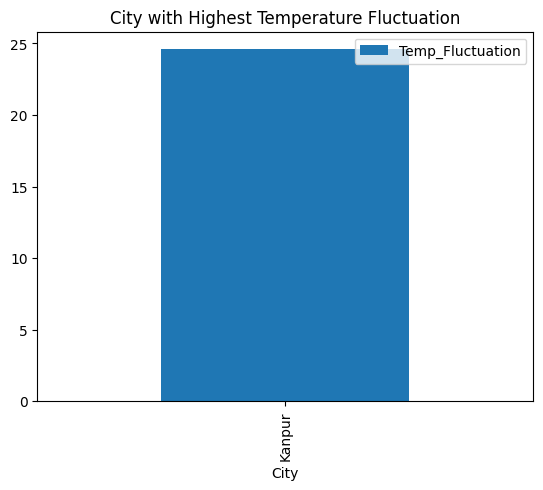

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(result6, columns=["City", "Temp_Fluctuation"])
df.plot(kind="bar", x="City", y="Temp_Fluctuation", title="City with Highest Temperature Fluctuation")


## 7. 🌧️ Most Rainy Days

In [ ]:
query7 = """
SELECT city, COUNT(*) AS rainy_days
FROM weather_data
WHERE Precipitation_mm	 > 0
GROUP BY city
ORDER BY rainy_days DESC
LIMIT 1;
"""
cur.execute(query7)
result7 = cur.fetchall()
print(" 🌧️ Most Rainy Days:", result7)




 🌧️ Most Rainy Days: [('Patna', 60)]


## 8. 🌫️ Lowest Average Visibility

In [ ]:
query8 = """
SELECT city, AVG(Visibility_km) AS avg_visibility
FROM weather_data
GROUP BY city
ORDER BY avg_visibility ASC
LIMIT 1;
"""
cur.execute(query8)
result8 = cur.fetchall()
print(" 🌫️ Lowest Average Visibility:", result8)

 🌫️ Lowest Average Visibility: [('Kanpur', 5.050000000000001)]


## 9. 🔄 Temperature-Humidity Correlation

In [ ]:
df_weather_sql[['Temperature_C', 'Humidity_Percentage']].corr(method='pearson')

,Temperature_C,Humidity_Percentage
Temperature_C,1.000000,-0.079876
Humidity_Percentage,-0.079876,1.000000


## 10. 📉 Highest Pressure Variation

In [ ]:
query10 = """
SELECT city, MAX(Pressure_hPa) - MIN(Pressure_hPa) AS pressure_variation
FROM weather_data
GROUP BY city
ORDER BY pressure_variation DESC
LIMIT 1;
"""
cur.execute(query10)
result10 = cur.fetchall()
print(" 📉 Highest Pressure Variation:", result10)

 📉 Highest Pressure Variation: [('Surat', 50)]


# **Creating a Streamlit App with Filters**
Now, we'll build a Streamlit app to display the results of our SQL queries. The app will allow users to filter the weather data by month and city.

In [ ]:
%%writefile app.py
import streamlit as st
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database configuration
db_config = {
    'host': 'gateway01.ap-southeast-1.prod.aws.tidbcloud.com',
    'port': 4000,
    'user': '3vt9swSrSwtAhk9.root',
    'password': 'T1Nulg4HrklVRG7T',
    'database': 'Weather_System'
}

# Function to connect to MySQL database
@st.cache_resource
def get_connection():
    """Create a cached database connection"""
    try:
        conn = mysql.connector.connect(**db_config)
        return conn
    except mysql.connector.Error as err:
        st.error(f"Database connection error: {err}")
        return None

def get_data(query, params=None):
    """Execute query and return results as DataFrame"""
    conn = get_connection()
    if conn is None:
        return pd.DataFrame()

    try:
        if params:
            df = pd.read_sql_query(query, conn, params=params)
        else:
            df = pd.read_sql_query(query, conn)
        return df
    except Exception as e:
        st.error(f"Query execution error: {e}")
        return pd.DataFrame()

# Streamlit App Title
st.set_page_config(page_title="Weather Data Analysis", layout="wide")

# Sidebar for navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Weather Data Visualization", "SQL Queries", "Creator Info"])

# -------------------------------- PAGE 1: Introduction --------------------------------
if page == "Project Introduction":
    st.title("🌦️ Weather Data Analysis")
    st.subheader("📊 A Streamlit App for Exploring Weather Trends")
    st.write("""
    This project analyzes weather data from different cities using a MySQL database.
    It provides visualizations for temperature, humidity, wind speed, and other weather parameters.

    **Features:**
    - View and filter weather data by city, date, or month.
    - Generate dynamic visualizations for multiple weather features.
    - Run predefined SQL queries to explore insights.

    **Database Used:** MySQL (TiDB Cloud)
    """)

# -------------------------------- PAGE 2: Weather Data Visualization --------------------------------
elif page == "Weather Data Visualization":
    st.title("📊 Weather Data Visualizer")

    # Fetch city list
    cities_df = get_data("SELECT DISTINCT City FROM weather_data")

    if cities_df.empty:
        st.error("Could not retrieve city list. Please check your database connection and table.")
    else:
        cities = cities_df["City"].tolist()

        # Filters
        selected_city = st.selectbox("Select City", cities)
        date_option = st.radio("Filter By:", ["Specific Day", "Entire Month"])

        if date_option == "Specific Day":
            selected_date = st.date_input("Choose a Date")
            query = "SELECT * FROM weather_data WHERE City = %s AND Date = %s"
            df = get_data(query, params=(selected_city, selected_date.strftime("%Y-%m-%d")))
        else:
            selected_month = st.selectbox("Select Month", range(1, 13))
            query = "SELECT * FROM weather_data WHERE City = %s AND MONTH(Date) = %s"
            df = get_data(query, params=(selected_city, selected_month))

        if not df.empty:
            st.write("### Weather Data", df)

            # Select feature to visualize
            feature = st.selectbox("Select Feature to Visualize",
                ["Temperature_C", "Humidity_Percentage", "Wind_Speed_kmh",
                 "Precipitation_mm", "Pressure_hPa", "Cloud_Cover_Percentage",
                 "Visibility_km"])

            # Visualization
            st.write(f"### {feature} Trends")
            fig, ax = plt.subplots(figsize=(10, 5))
            sns.lineplot(data=df, x="Date", y=feature, marker="o", label=feature, ax=ax)
            plt.xticks(rotation=45)
            st.pyplot(fig)
            plt.close()

            # Bar chart for Weather Condition
            if "Weather_Condition" in df.columns:
                st.write("### Weather Condition Distribution")
                fig, ax = plt.subplots(figsize=(8, 4))
                sns.countplot(y=df["Weather_Condition"], palette="coolwarm", ax=ax)
                st.pyplot(fig)
                plt.close()

        else:
            st.warning("No data available for the selected filters.")

# -------------------------------- PAGE 3: SQL Queries --------------------------------
elif page == "SQL Queries":
    st.title("📋 SQL Query Results")

    queries = {
        "1. Average Temperature per City": "SELECT City, AVG(Temperature_C) AS Avg_Temperature FROM weather_data GROUP BY City",
        "2. Highest Humidity per City": "SELECT City, MAX(Humidity_Percentage) AS Max_Humidity FROM weather_data GROUP BY City",
        "3. Lowest Temperature Recorded": "SELECT City, MIN(Temperature_C) AS Min_Temperature, Date FROM weather_data",
        "4. Wind Speed Trends": "SELECT City, AVG(Wind_Speed_kmh) AS Avg_Wind_Speed FROM weather_data GROUP BY City",
        "5. Most Common Weather Condition": "SELECT Weather_Condition, COUNT(*) AS Frequency FROM weather_data GROUP BY Weather_Condition ORDER BY Frequency DESC LIMIT 1"
    }

    selected_query = st.selectbox("Choose a Query", list(queries.keys()))
    query_result = get_data(queries[selected_query])

    if not query_result.empty:
        st.write("### Query Result:")
        st.dataframe(query_result)
    else:
        st.warning("No results found for this query.")

# -------------------------------- PAGE 4: Creator Info --------------------------------
elif page == "Creator Info":
    st.title("👩‍💻 Creator of this Project")
    st.write("""
    **Developed by:** Vasanth_P
    **Skills:** Python, SQL, Data Analysis, Streamlit, Pandas, MySQL

    **Connect with me:**
    - GitHub: [https://github.com/VasanthPrakasam]
    - LinkedIn: [https://www.linkedin.com/in/vasanth-prakasam-a490b0334/]
    """)

Writing app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com   # this command will generate a password for you(copy that)

35.237.176.121


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.176.121:8501

⠇⠏⠋⠙⠹your url is: https://yellow-needles-tan.loca.lt
y
/content/app.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/content/app.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=params)
/content/app.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = 